# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ni Komang Marsyani
- **Email:** marsyani288@gmail.com
- **ID Dicoding:** ni_komang_marsyani

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda pada setiap *season* dan rentang tanggal tertentu?
- Bagaimana perbandingan jumlah penyewaan sepeda pada hari kerja dan hari libur di setiap bulannya?

## Import Semua Packages/Library yang Digunakan

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [43]:
# Memuat tabel day

day_data = pd.read_csv('/content/sample_data/day.csv')

day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Menampilkan 5 baris pertama dari DataFrame *day_data* untuk melihat gambaran awal dari data


In [44]:
# Memuat tabel hour

hour_data = pd.read_csv('/content/sample_data/hour.csv')

hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Menampilkan 5 baris pertama dari DataFrame *hour_data* untuk melihat gambaran awal dari data.

- Setelah melihat dan membandingkan data *day_data* dan *hour_data*, selanjutnya saya akan menggunakan *day_data* karena cenderung lebih efisien untuk analisis umum


### Assessing Data

In [45]:
# Menilai Data day_data

day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Terdapat kesalahan pada kolom *dteday*, tipe data *object* menunjukkan bahwa kolom *dteday* diperlakukan sebagai *string*. Tipe data pada kolom *dteday* sebaiknya diubah menjadi *datetime*

- Tidak ada *missing value* pada pada seluruh kolom tersebut

In [46]:
# Memeriksa duplikasi data

print("Jumlah duplikasi: ", day_data.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak terdapat duplikasi data

In [47]:
# Memeriksa parameter statistik

day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Terdapat nilai 0 pada kolom *sum*, hal ini bisa jadi wajar jika terjadi dalam kondisi cuaca kering atau dengan kata lain saat *season* bernilai 2 yaitu *summer*, tetapi jika dilihat pada kategori *weathersit*, maka nilai 0 pada *sum* akan menjadi tidak wajar karena tidak ada kondisi cuaca di kategori *weathersit* yang mendukung nilai *sum* 0.

In [48]:
# Menghitung jumlah data dengan nilai kelembapan atau hum 0

hum_zero_count = (day_data.hum == 0).sum()
print(f'Jumlah kelembapan 0: {hum_zero_count}')

Jumlah kelembapan 0: 1


**Insight:**
- Terdapat 1 data dengan nilai kelembapan atau *hum* 0

In [49]:
# Memfilter data di mana kolom hum bernilai 0
hum_zero_data = day_data[day_data['hum'] == 0]

# Melihat kolom weathersit dan season pada baris yang kelembapannya 0
print(hum_zero_data[['hum', 'weathersit', 'season']])

    hum  weathersit  season
68  0.0           3       1


**Insight:**
- Pada baris yang nilai *hum* bernilai 0 atau kondisi kering, *weathersit* bernilai 3 yang menunjukkan kondisi hujan dan salju ringan yang seharusnya disertai dengan kelembapan yang relatif tinggi, kemudian *season* bernilai 1 yang menunjukkan musim semi atau *spring* dan biasanya ditandai dengan cuaca yang lembap karena sering terjadi hujan. Dengan begitu, *hum* yang bernilai 0 menunjukkan adanya kesalahan data.

### Cleaning Data

In [50]:
# Mengubah tipe data kolom dteday menjadi datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Memeriksa perubahan tipe datanya
print(day_data.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


**Insight:**
- Tipe data kolom *dteday* telah berubah dari *object* menjadi *datetime*.

In [51]:
# Menghitung median kelembapan untuk season yang bernilai 1 atau spring
median_humidity_season_1 = day_data[day_data['season'] == 1]['hum'].median()

# Menggantikan semua nilai hum yang bernilai 0 dengan median hum pada season yang bernilai 1
day_data.loc[day_data['hum'] == 0, 'hum'] = median_humidity_season_1

# Menghitung jumlah hum yang masih bernilai 0
hum_zero_count = (day_data.hum == 0).sum()
print(f'Jumlah kelembapan 0: {hum_zero_count}')

Jumlah kelembapan 0: 0


**Insight:**
- Setelah kode dijalankan, tidak ada lagi *hum* yang bernilai 0

## Exploratory Data Analysis (EDA)

### Explore Data day_data

In [52]:
# Rangkuman parameter statistik dari data day_data

day_data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628638,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140553,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Berdasarkan parameter statistik dari data *day_data* di atas, dapat dilihat bahwa nilai *mean* adalah 0.68, dengan 0 mengindikasikan hari libur dan 1 mengindikasikan hari kerja. Informasi ini dapat memberikan gambaran mengenai penyewaan sepeda pada hari kerja dan hari libur.

In [53]:
# Mapping untuk kolom season
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Menerapkan mapping pada kolom season
day_data['season'] = day_data['season'].map(season_mapping)

# Melakukan groupby berdasarkan season dan dteday, kemudian menghitung total penyewaan sepeda
season_rental_totals = day_data.groupby(['season', 'dteday'])['cnt'].sum().reset_index()

# Menampilkan hasil
print(season_rental_totals)


     season     dteday   cnt
0      Fall 2011-06-21  4835
1      Fall 2011-06-22  4507
2      Fall 2011-06-23  4790
3      Fall 2011-06-24  4991
4      Fall 2011-06-25  5202
..      ...        ...   ...
726  Winter 2012-12-16  3786
727  Winter 2012-12-17  4585
728  Winter 2012-12-18  5557
729  Winter 2012-12-19  5267
730  Winter 2012-12-20  4128

[731 rows x 3 columns]


**Insight:**
- Setelah kode dijalankan, maka akan tampil jumlah penyewaan pada *season* tertentu dan *tanggal* tertentu.

In [66]:
# Melakukan groupby berdasarkan workingday dan dteday (tanggal penuh), kemudian menghitung total penyewaan sepeda
workingday_rental_totals = day_data.groupby(['workingday', 'dteday'])['cnt'].sum().reset_index()

# Mengubah nilai 0 dan 1 di kolom 'workingday' menjadi 'No' dan 'Yes' agar lebih mudah dibaca
workingday_rental_totals['workingday'] = workingday_rental_totals['workingday'].map({0: 'No', 1: 'Yes'})

# Menampilkan hasil
print(workingday_rental_totals)


    workingday     dteday   cnt
0           No 2011-01-01   985
1           No 2011-01-02   801
2           No 2011-01-08   959
3           No 2011-01-09   822
4           No 2011-01-15  1248
..         ...        ...   ...
726        Yes 2012-12-24   920
727        Yes 2012-12-26   441
728        Yes 2012-12-27  2114
729        Yes 2012-12-28  3095
730        Yes 2012-12-31  2729

[731 rows x 3 columns]


**Insight:**
- Setelah kode dijalankan, maka akan tampil jumlah penyewaan pada hari kerja dan hari libur di setiap bulannya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda pada setiap *season* dan rentang tanggal tertentu?


<ipython-input-55-96f8d2c059a0>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='cnt', data=season_rental_totals, palette='Blues_r', ci=None)
<ipython-input-55-96f8d2c059a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=season_rental_totals, palette='Blues_r', ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_grou

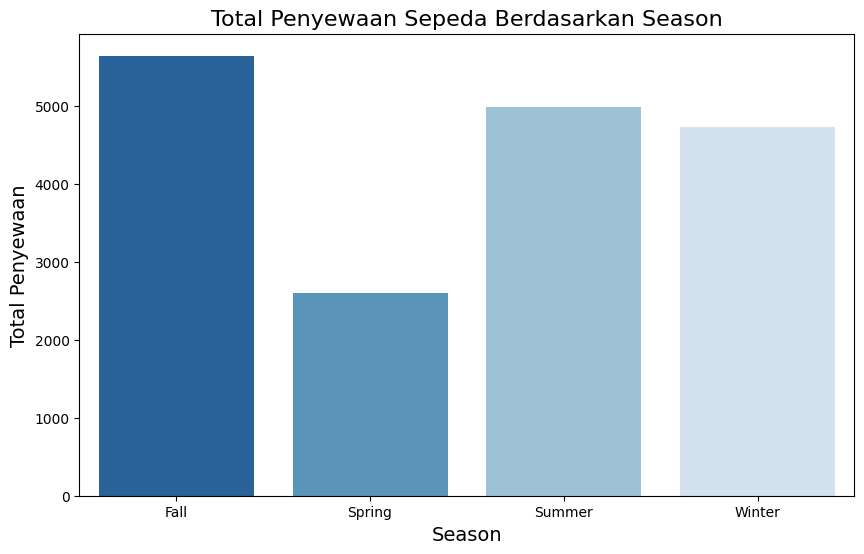

In [55]:
# Membuat barchart menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=season_rental_totals, palette='Blues_r', ci=None)

# Menambahkan judul dan label sumbu
plt.title('Total Penyewaan Sepeda Berdasarkan Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Penyewaan', fontsize=14)

# Menampilkan plot
plt.show()

**Insight:**
- Berdasarkan *bar chart* di atas, dapat dilihat bahwa terdapat perbedaan jumlah penyewaan pada setiap *season*, total penyewaan terbanyak terjadi saat *season* *Fall*, kemudian diikuti dengan *Summer*, *Winter*, dan terakhir penyewaan terendah pada *season* *Spring*.

### Pertanyaan 2: Bagaimana perbandingan jumlah penyewaan sepeda pada hari kerja dan hari libur di setiap bulannya?

<ipython-input-56-356e54ad6372>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


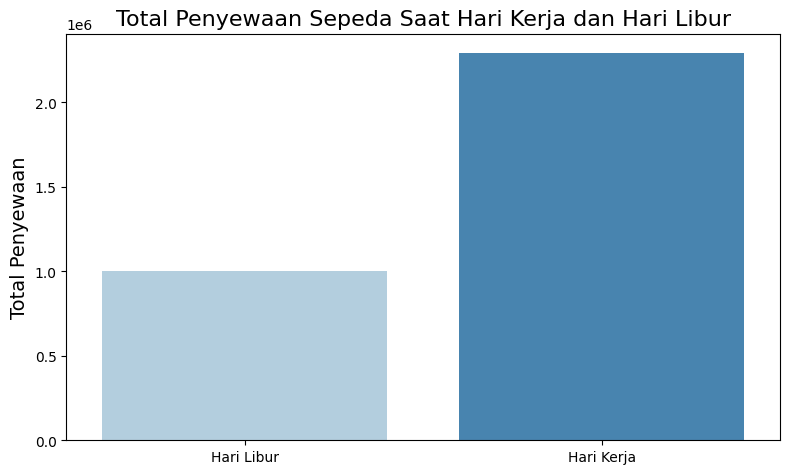

In [56]:
# Menghitung total penyewaan untuk Hari Kerja dan Hari Libur
total_no = workingday_rental_totals.loc[workingday_rental_totals['workingday'] == 'No', 'cnt'].sum()
total_yes = workingday_rental_totals.loc[workingday_rental_totals['workingday'] == 'Yes', 'cnt'].sum()

# Menyusun data untuk plotting
categories = ['Hari Libur', 'Hari Kerja']
values = [total_no, total_yes]

# Mengatur ukuran figure
plt.figure(figsize=(8, 5))

# Membuat barplot
sns.barplot(x=categories, y=values, palette='Blues')

# Menambahkan judul dan label sumbu
plt.title('Total Penyewaan Sepeda Saat Hari Kerja dan Hari Libur', fontsize=16)
plt.ylabel('Total Penyewaan', fontsize=14)
plt.xticks(rotation=0)  # Mengatur rotasi label sumbu x agar lebih mudah dibaca

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan *bar chart* di atas, dapat dilihat bahwa penyewaan sepeda pada hari kerja lebih banyak dibandingkan dengan penyewaan pada hari libur.

## Convert Data Frame Menjadi File .csv

In [59]:
# Menyimpan hasil groupby sebagai file .csv
season_rental_totals.to_csv('/content/sample_data/season_rental_totals.csv')

In [67]:
# Menyimpan hasil groupby sebagai file .csv
workingday_rental_totals.to_csv('/content/sample_data/workingday_rental_totals.csv')

**Insight:**
- Saat kode di atas dijalankan, maka *data frame* yang menampung nilai *groupby* yang juga digunakan untuk visualisasi akan tersimpan dalam file .csv

## Conclusion

- Berdasarkan visualisasi dengan *bar chart* pada pertanyaan pertama, menunjukkan bahwa *season* berpengaruh terhadap performa penyewaan sepeda, di mana penyewaan sepeda paling tinggi terjadi saat *season* *Fall*, kemudian *Summer*, *Winter*, dan terakhir *Spring*. Performa penyewaan sepeda dapat terjadi karena kondisi dari setiap *season* tersebut.
- Berdasarkan visualisasi dengan *bar chart* pada pertanyaan kedua, menunjukkan bahwa adanya perbedaan yang cukup besar antara penyewaan sepeda pada saat hari libur dan hari kerja di setiap bulannya. Penyewaan sepeda pada hari kerja cenderung lebih tinggi dibandingkan dengan hari libur di setiap bulannya.